In [61]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

customer_df = pd.read_csv('customer_details.csv')
basket_df = pd.read_csv('basket_details.csv')

sex
Male                76.610
Female              23.345
kvkktalepsilindi     0.040
UNKNOWN              0.005
Name: proportion, dtype: float64


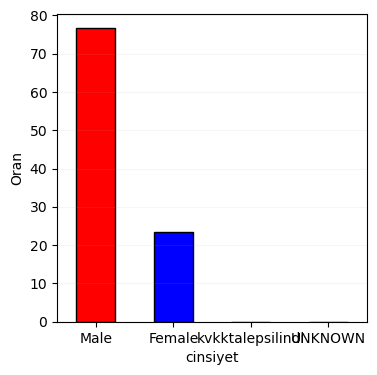

In [47]:
cinsiyet_ortalama = customer_df["sex"].value_counts(normalize=True) * 100
print(cinsiyet_ortalama)
#.mul(100).plot.pie(autopct = '%.1f%%') 

plt.figure(figsize = (4,4))
cinsiyet_ortalama.plot(kind = 'bar', color = ['red', 'blue'], edgecolor = 'black')
plt.xlabel('cinsiyet')
plt.ylabel('Oran')
plt.xticks(rotation = 0)
plt.grid(axis='y', alpha=0.1)
plt.show()

In [48]:
yas_ortalama = customer_df['customer_age'].mean().astype(int)
print("Ortalama Yaş:", yas_ortalama)

Ortalama Yaş: 262


Axes(0.22375,0.11;0.5775x0.77)


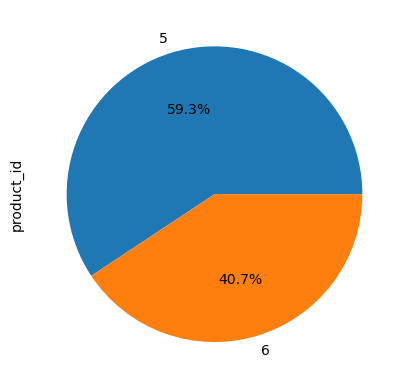

In [60]:
basket_df['yil'] =pd.to_datetime(basket_df['basket_date']).dt.year
basket_df['ay'] =pd.to_datetime(basket_df['basket_date']).dt.month
basket_df['gün'] =pd.to_datetime(basket_df['basket_date']).dt.day

aylik_siparis = basket_df.groupby('ay')['product_id'].count().plot.pie(autopct = '%.1f%%')
print(aylik_siparis)

In [50]:
günlük_siparis = basket_df.groupby('gün')['product_id'].count().idxmax()
print("En cok siparis verilen gun:",günlük_siparis)

En cok siparis verilen gun: 27


En cok satilan 5 urun:
 Axes(0.22375,0.11;0.5775x0.77)


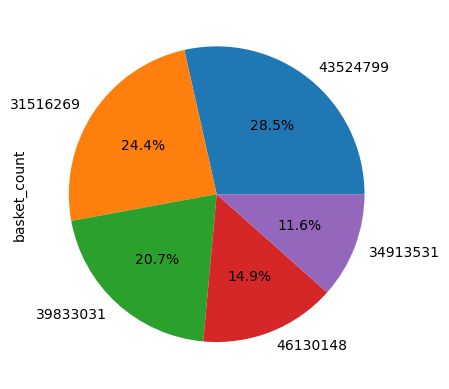

In [51]:
toplam_satis = basket_df.groupby('product_id')['basket_count'].sum().sort_values(ascending=False).head(5).plot.pie(autopct = '%.1f%%')
print("En cok satilan 5 urun:\n",toplam_satis)

In [52]:
top_müsteri = basket_df['customer_id'].value_counts().head(5)
print("En cok alisveris yapan 5 musteri:\n",top_müsteri)

En cok alisveris yapan 5 musteri:
 customer_id
8276934     8
11082470    8
18617678    6
29996693    5
7097820     5
Name: count, dtype: int64


En yuksek satis yapilan 5 tarih:
 Axes(0.22375,0.11;0.5775x0.77)


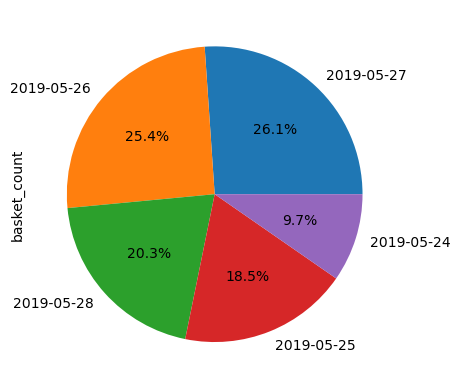

In [53]:
satis = basket_df.groupby('basket_date')['basket_count'].sum().sort_values(ascending=False).head(5).plot.pie(autopct = '%.1f%%')
print("En yuksek satis yapilan 5 tarih:\n",satis)


C:\Users\mkalb\AppData\Local\Temp\ipykernel_20304\1811460144.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_df['customer_age'].fillna(customer_df['customer_age'].median(), inplace=True)
C:\Users\mkalb\AppData\Local\Temp\ipykernel_20304\1811460144.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yas_satis = merged.groupby

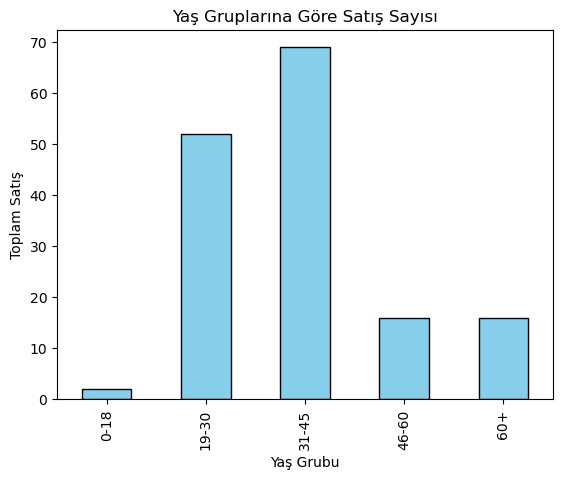

In [56]:
#Yaş gruplarına göre satış analizi
customer_df['customer_age'] = pd.to_numeric(customer_df['customer_age'], errors='coerce')
customer_df['customer_age'].fillna(customer_df['customer_age'].median(), inplace=True)

bins = [0, 18, 30, 45, 60, 3000]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
customer_df['yas_grubu'] = pd.cut(customer_df['customer_age'], bins=bins, labels=labels)

merged = basket_df.merge(customer_df, on='customer_id')
yas_satis = merged.groupby('yas_grubu')['basket_count'].sum()

yas_satis.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Yaş Gruplarına Göre Satış Sayısı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Toplam Satış')
plt.show()

In [57]:
#Cinsiyete göre en popüler ürünler
populer_urunler = merged.groupby(['sex', 'product_id'])['basket_count'].sum().reset_index()
populer_urunler = populer_urunler.sort_values(['sex','basket_count'], ascending=[True,False]).groupby('sex').head(10)
print(populer_urunler)


       sex  product_id  basket_count
1   Female     3213654             3
7   Female    35058279             3
8   Female    35722328             3
9   Female    38610580             3
12  Female    43524799             3
0   Female       82875             2
2   Female     4033598             2
3   Female     6736398             2
4   Female     7163984             2
5   Female    32252271             2
17    Male     3446783             3
22    Male     6059073             3
25    Male     6616058             3
44    Male    35375120             3
47    Male    39329175             3
59    Male    46373374             3
14    Male      598023             2
15    Male     2819775             2
16    Male     2843584             2
18    Male     4063284             2


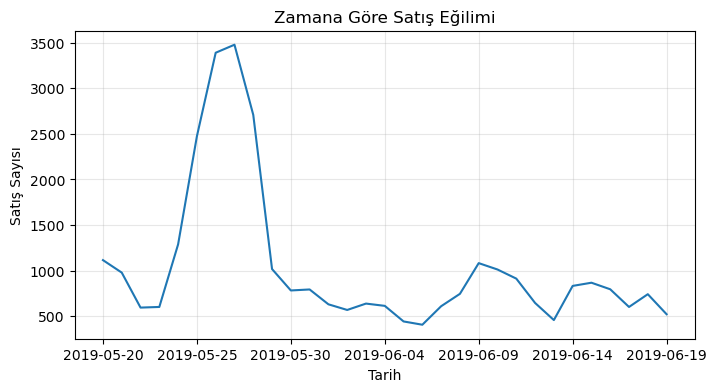

In [58]:
zaman_trendi = basket_df.groupby('basket_date')['basket_count'].sum()
zaman_trendi.plot(figsize=(8,4))
plt.title('Zamana Göre Satış Eğilimi')
plt.xlabel('Tarih')
plt.ylabel('Satış Sayısı')
plt.grid(True, alpha=0.3)
plt.show()
